In [2]:
import pandas as pd                 # Thêm thư viện pandas để xử lý và lưu dữ liệu dưới dạng bảng và lưu vào file csv
def classify_heart_rate(hr):        # Tiêu chí phân loại nhịp tim dựa vào khoảng giá trị
    if 56 <= hr <= 61:
        return "HR: Excellent"      # Nhịp tim từ 56 đến 61 bpm thuộc loại Xuất Sắc, cho thấy người rất khoẻ mạnh
                                    # Thường gặp ở các vận động viên, người tập chuyên tập luyện thể thao!
    elif 62 <= hr <= 65:
        return "HR: Good"           # Nhịp tim từ 62 đến 65 bpm thuộc loại Tốt, cho thấy người khoẻ mạnh, tim mạch tốt
                                    # Thường gặp ở người tập luyện thể thao thường xuyên!
    elif 66 <= hr <= 69:         
        return "HR: Above Average"  # Nhịp tim từ 66 đến 69 bpm thuộc loại trên mức Trung bình, vẫn nằm trong ngưỡng khoẻ mạnh!
    elif 70 <= hr <= 73:
        return "HR: Average"        # Nhịp tim từ 70 đến 73 bpm thuộc loại Trung bình, ở mức chấp nhận được ở người trưởng thành
                                    # Thường gặp phổ biến ở người ít vận động hoặc có thể lực bình thường!
    elif 74 <= hr <= 81:
        return "HR: Below Average"  # Nhịp tim từ 74 đến 81 bpm thuộc loại dưới mức Trung bình, nhịp tim hơi cao so với bình thường
                                    # Thường gặp ở người ít vận động hoặc thể lực kém!
    elif 82 <= hr <= 250:
        return "HR: Bad"            # Nhịp tim từ 82 bpm trở lên thuộc loại Xấu, có sức khoẻ tim mạch kém!
    else:
        return "HR: Undetermined"   # Các giá trị khác mà cảm biến đo được nhưng không nằm trong bảng phân loại thì đặt là không xác định!

def classify_spo2(spo2):            # Tiêu chí phân loại SpO2 dựa vào khoảng giá trị
    if 98 <= spo2 <= 100:
        return "SpO2: Normal"       # SpO2 từ 98 đến 100%  thuộc loại Bình Thường, cho thấy người khoẻ mạnh!
    elif 95 <= spo2 <= 97:
        return "SpO2: Tolerable"    # SpO2 từ 95 đến 97% thuộc loại Chấp Nhận Được, không gây ảnh hưởng nhiều đến sức khoẻ!
                                    # Thường gặp ở những người lớn tuổi, người đang cảm nhẹ!
    elif 90 <= spo2 <= 94: 
        return "SpO2: Decreased"    # SpO2 từ 90 đến 94% thuộc loại Oxy Giảm, cần được hỗ trợ y yế!
                                    # Thường gặp ở các bệnh về hô hấp, COVID 19
    elif 70 <= spo2 < 90:
        return "SpO2: Critical"     # SpO2 từ 70 đến 90% thuộc loại Nguy Hiểm, gây ra do các bệnh nặng hoặc tổn thương các cơ quan trong cơ thể!
        
    elif 0 <= spo2 < 70:
        return "SpO2: Life-Threatening" # SpO2 ở mức dưới 70% thuộc loại Nguy Hiểm Đến Tính Mạng, cần phải ứng cứu kịp thời để duy trì sự sống!
    else:
        return "SpO2: Undetermined" # Các giá trị khác mà cảm biến đo được nhưng không nằm trong bảng phân loại thì đặt là không xác định!

def generate_health_data():
    all_data = []                                             # Danh sách lưu trữ tất cả các dữ liệu
                                                              # Duyệt qua các giá trị nhịp tim và SpO2
    for hr in range(30, 251):                                 # Khoảng giá trị nhịp tim từ 30 đến 250 bpm 
        for spo2 in range(0, 101):                            # Khoảng giá trị SpO2 từ 0 đến 100% 
            hr_status = classify_heart_rate(hr)               # Phân loại nhịp tim bằng hàm classify_heart_rate và trả kết quả về hr_status
            spo2_status = classify_spo2(spo2)                 # Phân loại SpO2 bằng hàm classify_spo2 và trả kết quả về spo2_status

            # Xác định trạng thái sức khỏe dựa trên nhịp tim và SpO2
            if hr_status == "HR: Undetermined" or spo2_status == "SpO2: Undetermined":
                final_status = "Undetermined"                 # Nếu một trong 2 kết quả là Không Xác Định thì kết quả cuối cùng là Không Xác Định
            else:
                final_status = f"{hr_status} - {spo2_status}" # Ghép kết quả thành chuỗi
            all_data.append([hr, spo2, final_status])         # Thêm kết quả vào danh sách all_data
    return all_data

# Tạo DataFrame và lưu vào file csv
all_data = generate_health_data()
df = pd.DataFrame(all_data, columns=["HeartRate", "SpO2", "HealthStatus"])  # Tạo bảng với 3 cột: HeartRate, SpO2, HealthStatus
df.to_csv("health_data_labeled.csv", index=False) # Lưu dữ liệu vào file health_data_labeled.csv, không bao gồm chỉ số dòng (index = False)
print("Tạo xong file health_data_labeled.csv!")   # In ra thông báo khi tạo xong file health_data_labeled.csv

Tạo xong file health_data_labeled.csv!


Dữ liệu huấn luyện có 22321 dòng và 3 cột.
Đã chia dữ liệu: 17856 mẫu huấn luyện, 4465 mẫu kiểm tra.

Độ chính xác trên tập kiểm tra: 99.93%

Báo cáo phân loại trên tập kiểm tra:
                                            precision    recall  f1-score   support

        HR: Above Average - SpO2: Critical       1.00      0.96      0.98        23
       HR: Above Average - SpO2: Decreased       1.00      0.83      0.91         6
HR: Above Average - SpO2: Life-Threatening       1.00      1.00      1.00        50
          HR: Above Average - SpO2: Normal       0.67      1.00      0.80         2
       HR: Above Average - SpO2: Tolerable       1.00      1.00      1.00         2
              HR: Average - SpO2: Critical       1.00      1.00      1.00        11
             HR: Average - SpO2: Decreased       1.00      1.00      1.00         1
      HR: Average - SpO2: Life-Threatening       1.00      1.00      1.00        63
                HR: Average - SpO2: Normal       1.00      1.00 

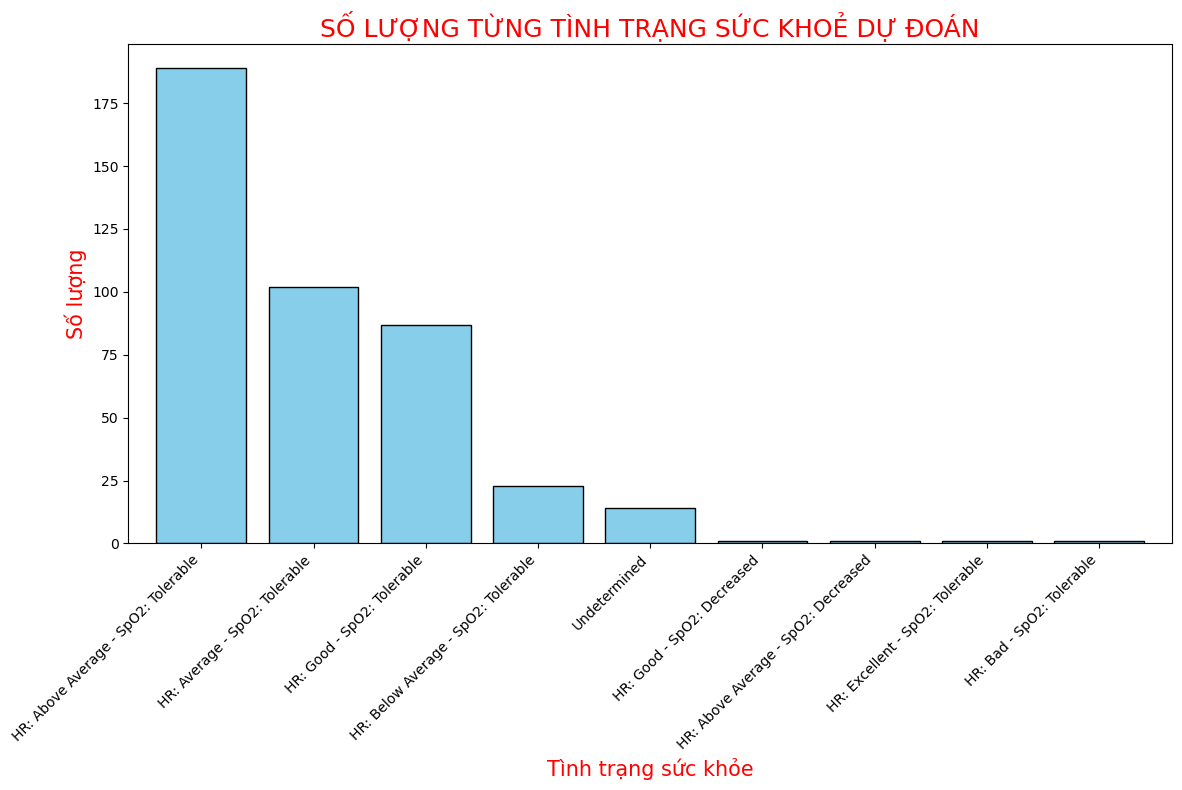

In [4]:
# THÊM CÁC THƯ VIỆN CẦN THIẾT
import pandas as pd                                   # Thêm thư viện pandas để xử lý và lưu dữ liệu dưới dạng bảng và lưu vào file csv
from sklearn.ensemble import RandomForestClassifier   # Thêm thuật toán Random Forest từ scikit-learn để dùng làm mô hình phân loại
from sklearn.preprocessing import LabelEncoder        # Thêm LabelEncoder để đổi nhãn từ dạng chuỗi sang số
from sklearn.model_selection import train_test_split  # Thêm train_test_split để chia dữ liệu thành "tập huấn luyện" và "tập kiểm tra"
from sklearn.metrics import classification_report, accuracy_score  # Thêm classification_report và accuracy_score để đánh giá mô hình
import joblib                                         # Thêm joblib để lưu và tải mô hình đã huấn luyện.
import matplotlib.pyplot as plt                       # Thêm matplotlib để vẽ biểu đồ cho kết quả phân loại

# 1. ĐỌC DỮ LIỆU HUẤN LUYỆN TỪ FILE health_data_labeled.csv
df_train = pd.read_csv("health_data_labeled.csv")
print(f"Dữ liệu huấn luyện có {df_train.shape[0]} dòng và {df_train.shape[1]} cột.")  # In ra số dòng và số cột của dữ liệu huấn luyện

# 2. TÁCH ĐẶC TRƯNG (HeartRate, SpO2) VÀ NHÃN HealthStatus
X = df_train[["HeartRate", "SpO2"]]  # Chuẩn bị dữ liệu đầu vào X: Đặc trưng (features) gồm HeartRate và SpO2
y = df_train["HealthStatus"]         # Chuẩn bị dữ liệu đầu ra y: Nhãn (label) gồm HealthStatus

# 3. MÃ HOÁ NHÃN TỪ DẠNG CHUỖI SANG DẠNG SỐ ĐỂ PHÙ HỢP VỚI ĐẦU VÀO CỦA MÔ HÌNH (Label Encoding)
encoder = LabelEncoder()              # Tạo đối tượng encoder
y_encoded = encoder.fit_transform(y)  # Biến đổi nhãn thành số nguyên (0, 1, 2,...) và lưu vào y_encoded

# 4. CHIA DỮ LIỆU THÀNH "TẬP HUẤN LUYỆN" VÀ "TẬP KIỂM TRA"
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# Chia dữ liệu thành 20% dùng để kiểm tra (test_size=0.2) và 80% còn lại dùng để huấn luyện

print(f"Đã chia dữ liệu: {X_train.shape[0]} mẫu huấn luyện, {X_test.shape[0]} mẫu kiểm tra.")
# In ra thông báo kết quả số mẫu huấn luyện và số mẫu kiểm tra đã chia

# 5. HUẤN LUYỆN MÔ HÌNH RANDOM FOREST
rf = RandomForestClassifier(n_estimators=300, random_state=42) 
# Tạo mô hình Random Forest với 300 cây quyết định, "càng nhiều cây trong rừng" thì mô hình càng phức tạp!
# Đặt random_state=42 để đảm bảo kết quả huấn luyện ổn định

rf.fit(X_train, y_train) 
# Huấn luyện mô hình trên tập huấn luyện

# 6. ĐÁNH GIÁ ĐỘ CHÍNH XÁC TRÊN "TẬP KIỂM TRA"
y_test_pred = rf.predict(X_test)                                 # Dự đoán nhãn trên tập kiểm tra
test_accuracy = accuracy_score(y_test, y_test_pred)              # Tính độ chính xác (tỉ lệ dự đoán trúng)
print(f"\nĐộ chính xác trên tập kiểm tra: {test_accuracy:.2%}")  # In ra thông báo về độ chính xác trên tập kiểm tra
print("\nBáo cáo phân loại trên tập kiểm tra:")                  # In ra báo cáo chi tiết về kết quả phân loại
print(classification_report(y_test, y_test_pred, target_names=encoder.classes_)) 
# In ra các báo cáo các chỉ số Precision, Recall, F1-Score cho từng lớp

# 7. LƯU MÔ HÌNH & ENCODER VÀO FILE ĐỂ SỬ DỤNG VỀ SAU
joblib.dump(rf, "random_forest_model.pkl")                       # random_forest_model.pkl là file chứa mô hình đã huấn luyện
joblib.dump(encoder, "label_encoder.pkl")                        # label_encoder.pkl là file chứa ánh xạ nhãn để giải mã kết quả
print("\nLưu mô hình và encoder thành công!")                    # In ra thông báo khi lưu xong mô hình và encoder 

#=======================================================================================================================================================

# 8. ĐỌC DỮ LIỆU THỰC TẾ TỪ FILE health_data.csv
df_real = pd.read_csv("health_data.csv")
print(f"\nDữ liệu thực tế có {df_real.shape[0]} dòng.")          
# In ra số dòng của dữ liệu thực tế

# 9. DỰ ĐOÁN TÌNH TRẠNG SỨC KHOẺ CHO DỮ LIỆU THỰC TẾ VÀ LƯU KẾT QUẢ DỰ ĐOÁN
X_real = df_real[["HeartRate", "SpO2"]]                          # Lấy đặc trưng HeartRate và SpO2 từ dữ liệu thực tế
y_pred_real_encoded = rf.predict(X_real)                         # Dự đoán tình trạng sức khoẻ theo dạng số
y_pred_real = encoder.inverse_transform(y_pred_real_encoded)     # Chuyển nhãn ngược lại từ dạng số về dạng chuỗi
df_real["PredictedHealthStatus"] = y_pred_real                   # Thêm cột PredictedHealthStatus vào DataFrame
df_real.to_csv("health_data_predicted_rf.csv", index=False)      # Lưu kết quả dự đoán vào file health_data_predicted_rf.csv
print("\nLưu kết quả dự đoán vào health_data_predicted_rf.csv thành công!") # In ra thông báo khi lưu xong

# 10. ĐẾM SỐ LƯỢNG TÌNH TRẠNG SỨC KHOẺ DỰ ĐOÁN
status_counts = df_real["PredictedHealthStatus"].value_counts()  # Đếm số lượng từng tình trạng sức khoẻ
print("\nSố lượng từng tình trạng sức khỏe dự đoán:")            # In ra thông báo về số lần xuất hiện mỗi loại sau khi đếm xong
print(status_counts)

# 11. TÌM TÌNH TRẠNG SỨC KHOẺ PHỔ BIẾN NHẤT
most_common_status = status_counts.idxmax()                      # Tìm tình trạng phổ biến nhất
most_common_count = status_counts.max()                          # Tìm số lần xuất hiện của tình trạng đó
print(f"\nTình trạng sức khỏe phổ biến nhất là: '{most_common_status}' với {most_common_count} lần xuất hiện!!!")
# In ra thông báo sau khi tìm được tình trạng sức khoẻ có số lần xuất hiện lớn nhất

# 12. VẼ ĐỒ THỊ THEO SỐ LƯỢNG CÁC TÌNH TRẠNG SỨC KHOẺ
plt.figure(figsize=(12, 8))                                                      # Điều chỉnh kích thước đồ thị
status_counts.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)    # Vẽ đồ thị dạng cột, màu xanh, viền đen, độ rộng cột là 0.8
plt.title("SỐ LƯỢNG TỪNG TÌNH TRẠNG SỨC KHOẺ DỰ ĐOÁN", fontsize=18, color='red') # Đặt tiêu đề cho đồ thị màu đỏ, cỡ chữ 18
plt.xlabel("Tình trạng sức khỏe", fontsize=15, color = 'red')                    # Đặt tiêu đề cho trục hoành màu đỏ, cỡ chữ 15
plt.ylabel("Số lượng", fontsize=15, color = 'red')                               # Đặt tiêu đề cho trục tung màu đỏ, cỡ chữ 15
plt.xticks(rotation=45, ha='right')                                              # Xoay các nhãn ở trục hoành 45 độ để tránh chồng chữ 
plt.tight_layout()                                                               # Tự động điều chỉnh bố cục trong đồ thị
plt.show()                                                                       # Hiển thị đồ thị